## 算法实现与求解
### 一般的非线性函数（非二次函数）

In [1]:
#coding:UTF-8
 
from numpy import *

#fun  f(x)=100*(x1^2-x2^2)+(x1-1)^2
def fun(x):
    return 100 * (x[0,0] ** 2 - x[1,0]) ** 2 + (x[0,0] - 1) ** 2
 
#gfun g(x)是一个2*1矩阵，第一行第一列是对x1求偏导，第二行第一列是对x2求偏导
def gfun(x):
    result = zeros((2, 1))
    result[0, 0] = 400 * x[0,0] * (x[0,0] ** 2 - x[1,0]) + 2 * (x[0,0] - 1)
    result[1, 0] = -200 * (x[0,0] ** 2 - x[1,0])
    return result

$min \quad f(x)=100(x_1^2-x_2)^2+(x_1-1)^2$

$g(x)=Df(x)=\begin{bmatrix} 400x_1(x_1^2-x_2)+2(x_1-1)  \\ -200(x_1^2-x_2)  \end{bmatrix}$

### rank1算法

rank1算法流程图
近似矩阵迭代公式：

${H_{k + 1}} = {H_k} + \frac{(\Delta {x^{\left( k \right)}}-{H_k}\Delta {g^{\left( k \right)}})(\Delta {x^{\left( k \right)}}-{H_k}\Delta {g^{\left( k \right)}})^T} {(\Delta {x^{\left( k \right)}}-{H_k}\Delta {g^{\left( k \right)}})^T\Delta {g^{\left( k \right)}}}$
![算法流程图](figure/rank1.jpg)

In [2]:
def rank1(fun, gfun, x0):
    result = []
    maxk = 500  #最大迭代次数
    rho = 0.55
    sigma = 0.4
    epsilon=1e-5; 
    m = shape(x0)[0]
    Hk = eye(m)
    k = 0
    while (k < maxk):
        gk = mat(gfun(x0))#计算梯度
        dk = -mat(Hk)*gk  #计算搜索方向
        if(np.linalg.norm(gk)<epsilon): #检验终止准则
            break 
        m = 0
        mk = 0
        while (m < 20): # 用Armijo搜索求步长 
            newf = fun(x0 + rho ** m * dk)
            oldf = fun(x0)
            if (newf < oldf + sigma * (rho ** m) * (gk.T * dk)[0,0]):
                mk = m
                break
            m = m + 1
        
        #rank1校正
        x = x0 + rho ** mk * dk
        sk = x - x0
        yk = gfun(x) - gk
        Hk = Hk + (sk-Hk*yk) * (sk-Hk*yk).T / ((sk-Hk*yk).T * yk)
        
        k = k + 1
        x0 = x
        result.append(fun(x0))
    
    return result

### DFP算法

DFP算法流程图
近似矩阵迭代公式：
${H_{k + 1}} = {H_k} + \frac{{\Delta {x^{\left( k \right)}}\Delta {x^{\left( k \right)T}}}}{{\Delta {x^{\left( k \right)T}}\Delta {g^{\left( k \right)}}}} - \frac{{\left[ {{H_k}\Delta {g^{\left( k \right)}}} \right]{{\left[ {{H_k}\Delta {g^{\left( k \right)}}} \right]}^T}}}{{\Delta {g^{\left( k \right)T}}{H_k}\Delta {g^{\left( k \right)}}}}$


![算法流程图](figure/dfp.jpg)

In [3]:
def dfp(fun, gfun, x0):
    result = []
    maxk = 500  #最大迭代次数
    rho = 0.55
    sigma = 0.4
    epsilon=1e-5; 
    m = shape(x0)[0]
    Hk = eye(m)
    k = 0
    while (k < maxk):
        gk = mat(gfun(x0))#计算梯度
        dk = -mat(Hk)*gk
        if(np.linalg.norm(gk)<epsilon): #检验终止准则
            break 
        m = 0
        mk = 0
        while (m < 20):
            newf = fun(x0 + rho ** m * dk)
            oldf = fun(x0)
            if (newf < oldf + sigma * (rho ** m) * (gk.T * dk)[0,0]):
                mk = m
                break
            m = m + 1
        
        #DFP校正
        x = x0 + rho ** mk * dk
        sk = x - x0
        yk = gfun(x) - gk
        if (sk.T * yk > 0):
            Hk = Hk - (Hk * yk * yk.T * Hk) / (yk.T * Hk * yk) + (sk * sk.T) / (sk.T * yk)
        
        k = k + 1
        x0 = x
        result.append(fun(x0))
    
    return result

### BFGS算法

BFGS算法流程图
近似矩阵迭代公式;
${H_{k + 1}} = {H_k} - \frac{{H_k}{\Delta {x^{\left( k \right)}}\Delta {x^{\left( k \right)T}}}{H_k}}{{\Delta {x^{\left( k \right)T}}{H_k}\Delta {x^{\left( k \right)}}}} +\frac{{\left[ {\Delta {g^{\left( k \right)}}} \right]{{\left[ {\Delta {g^{\left( k \right)}}} \right]}^T}}}{{\Delta {g^{\left( k \right)T}}\Delta {x^{\left( k \right)}}}}$

![算法流程图](figure/bfgs.jpg)

In [4]:
def bfgs(fun, gfun, x0):
    result = []
    maxk = 500 #最大迭代次数
    rho = 0.55
    sigma = 0.4
    epsilon=1e-5; 
    m = shape(x0)[0]
    Bk = eye(m)
    k = 0
    while (k < maxk):
        gk = mat(gfun(x0)) #计算梯度
        dk = mat(-linalg.solve(Bk, gk))
        if(np.linalg.norm(gk)<epsilon): #检验终止准则
            break 
        m = 0
        mk = 0
        while (m < 20):   #用Armijo搜索求步长 
            newf = fun(x0 + rho ** m * dk)
            oldf = fun(x0)
            if (newf < oldf + sigma * (rho ** m) * (gk.T * dk)[0,0]):
                mk = m
                break
            m = m + 1
        
        #BFGS校正
        x = x0 + rho ** mk * dk
        sk = x - x0
        yk = gfun(x) - gk
        if (yk.T * sk > 0):
            Bk = Bk - (Bk * sk * sk.T * Bk) / (sk.T * Bk * sk) + (yk * yk.T) / (yk.T * sk)
        
        k = k + 1
        x0 = x
        result.append(fun(x0))
    
    return result


`result`中记录了每一次迭代的`x`的函数值。`result`中元素的数量即迭代总次数。

## 算法收敛速度

43
6.469347536626816e-19


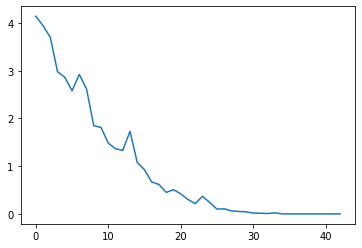

In [13]:
import matplotlib.pyplot as plt  
import numpy as np
    
x0 = mat([[-1.2], [1]])
result = rank1(fun, gfun, x0)
 
n = len(result)
ax = plt.figure().add_subplot(111)
x = arange(0, n, 1)
y = result
ax.plot(x,y)
print (n)
print (result[n-1])
plt.show()

33
2.1896368842271688e-16


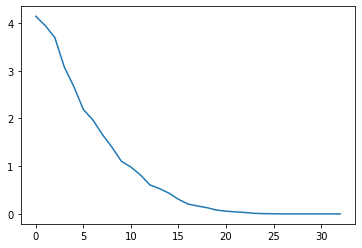

In [6]:
import matplotlib.pyplot as plt  
import numpy as np

x0 = mat([[-1.2], [1]])
result = dfp(fun, gfun, x0)
 
n = len(result)
ax = plt.figure().add_subplot(111)
x = arange(0, n, 1)
y = result
ax.plot(x,y)
print (n)
print (result[n-1]) 
plt.show()

32
6.753896559404069e-16


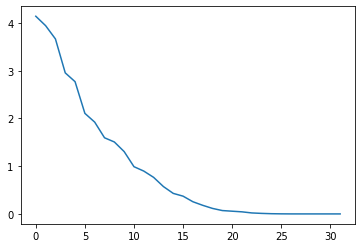

In [7]:
import matplotlib.pyplot as plt  
import numpy as np

x0 = mat([[-1.2], [1]])
result = bfgs(fun, gfun, x0)
 
n = len(result)
ax = plt.figure().add_subplot(111)
x = arange(0, n, 1)
y = result
ax.plot(x,y)
print (n)
print (result[n-1])
plt.show()

| 初始点   | 算法  | 迭代次数 | 目标函数值             |
| -------- | ----- | -------- | ---------------------- |
| [-1.2,0] | rank1 | 43       | 6.469347536626816e-19  |
| [-1.2,0] | DFP   | 33       | 2.1896368842271688e-16 |
| [-1.2,0] | BFGS  | 32       | 6.753896559404069e-16  |

```MATLAB
function [x,val,k]=sr1(fun,gfun, x0)
%功能: 用对称秩1算法求解无约束问题:  min f(x)
%输入: x0是初始点, fun, gfun分别是目标函数及其梯度
%输出:  x, val分别是近似最优点和最优值,  k是迭代次数.
maxk=500;   %给出最大迭代次数
rho=0.55;sigma=0.4; epsilon=1e-5; 
k=0;   n=length(x0); Hk=eye(n); 
while(k<maxk)
    gk=feval(gfun,x0); %计算梯度
    dk=-Hk*gk; %计算搜索方向
    if(norm(gk)<epsilon), break; end  %检验终止准则
    m=0; mk=0;
    while(m<20)   % 用Armijo搜索求步长 
        if(feval(fun,x0+rho^m*dk)<feval(fun,x0)+sigma*rho^m*gk'*dk)
            mk=m; break;
        end
        m=m+1;
    end
    x=x0+rho^mk*dk;  
    sk=x-x0;  yk=feval(gfun,x)-gk;
    Hk=Hk+(sk-Hk*yk)*(sk-Hk*yk)'/((sk-Hk*yk)'*yk); %秩1校正
    k=k+1;     x0=x;
end
val=feval(fun,x0); 
```

## 算法的不同

秩1算法的近似矩阵$H_k$不都是正定的。
秩2算法可以保证在任意第k步迭代下，只要一维搜索是精确的，近似矩阵$H_k$就都是正定的。
如DFP算法和BFGS算法。

## 利用三种算法求解二次型函数

$min \quad f(x)= \frac{1}{2} x^TQx-x^Tb+log(\pi)$

$Q=\begin{bmatrix} 5 & -3 \\ -3 & 2 \end{bmatrix}$,$\quad b=\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

初始点$x^(0)=[0,0]^T$

### rank1算法

22
7.03038991702876e-19
[0.7796505328309867, 0.647903329132764, 0.43174864447002853, 0.35395519320995333, 0.2790157858586189, 0.2301727452032303, 66.8551930552344, 0.3803419443079954, 0.01919688557291296, 0.014493403655030242, 0.0243827267616587, 0.006523531618577661, 0.004711909032094199, 0.003938932709861242, 0.005944832855606774, 0.00013813269252629403, 2.7062473522404853e-05, 1.1753584996447982e-06, 1.7974047514389684e-07, 4.12580600588475e-11, 4.2697255197291215e-13, 7.03038991702876e-19]


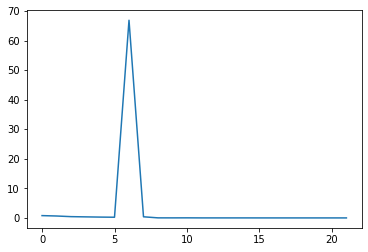

In [8]:
import matplotlib.pyplot as plt  
import numpy as np
    
x0 = mat([[0], [0]])
result = rank1(fun, gfun, x0) 
n = len(result)
ax = plt.figure().add_subplot(111)
x = arange(0, n, 1)
y = result
ax.plot(x,y)
print (n)
print (result[n-1])
print (result)   # 迭代中间结果
plt.show()

### DFP算法

29
7.19219715138461e-17
[0.7796505328309867, 0.6594092966734678, 0.4884649661302388, 0.37412962490090296, 0.34187217174408696, 0.3120357733196676, 0.2452711477829217, 0.2122170971698485, 0.12114855860725816, 0.09503104273020731, 0.06883922226115423, 0.051367526656193756, 0.023795380641520036, 0.017416572210177308, 0.012996917660099784, 0.007397028905316069, 0.004372484396145824, 0.00047420975648178657, 0.00030087781694019037, 0.00017741503728331413, 6.025114908106955e-05, 2.4188348072428142e-05, 2.6128936793145394e-06, 4.7596994547672995e-07, 4.256328564678119e-08, 1.4857356731312556e-09, 1.8314208202538454e-11, 7.56977430809567e-14, 7.19219715138461e-17]


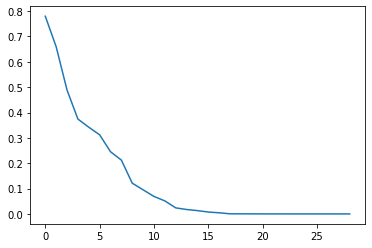

In [9]:
import matplotlib.pyplot as plt  
import numpy as np

x0 = mat([[0], [0]])
result = dfp(fun, gfun, x0)
 
n = len(result)
ax = plt.figure().add_subplot(111)
x = arange(0, n, 1)
y = result
ax.plot(x,y)
print (n)
print (result[n-1])
print (result)   # 迭代中间结果
plt.show()

### BFGS算法

20
2.20047705066948e-11
[0.7796505328309867, 0.6595694253943865, 0.47152888012853705, 0.34924438689304865, 0.3180704353850303, 0.23063472651536962, 0.15310047456201717, 0.12936214773849927, 0.08232065702719052, 0.04522341147137615, 0.026501461178135587, 0.018220593494777646, 0.009901412537376825, 0.00486909437034745, 0.0014634459405904923, 0.00033906943140043903, 5.44227522716887e-05, 3.839876322272881e-06, 1.0573888624004621e-07, 2.20047705066948e-11]


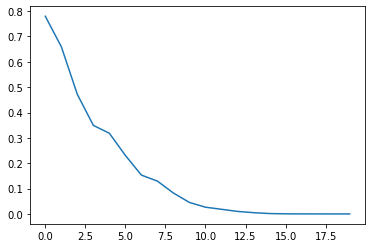

In [10]:
import matplotlib.pyplot as plt  
import numpy as np

x0 = mat([[0], [0]])
result = bfgs(fun, gfun, x0)
 
n = len(result)
ax = plt.figure().add_subplot(111)
x = arange(0, n, 1)
y = result
ax.plot(x,y)
print (n)
print (result[n-1])
print (result)   # 迭代中间结果
plt.show()

| 初始点   | 算法  | 迭代次数 | 目标函数值             |
| -------- | ----- | -------- | ---------------------- |
| [0,0] | rank1 | 22       |  7.03038991702876e-19|
| [0,0] | DFP   | 29       | 7.19219715138461e-17 |
| [0,0] | BFGS  | 20       |  2.20047705066948e-11|

从收敛的图形来看，rank1算法随着迭代，函数值并没有正常减小，而是有一个突变，这可能是中间迭代矩阵不正定引起的。
DFP算法和BFGS算法收敛图形趋势比较正常。

针对rank1算法和BFGS算法的中间结果进行进一步分析。

得到这个异常是在第5次迭代产生的。


### 异常分析

In [11]:
def rank1_test(fun, gfun, x0):
    result = []
    maxk = 500  #最大迭代次数
    rho = 0.55
    sigma = 0.4
    epsilon=1e-5
    m = shape(x0)[0]
    Hk = eye(m)
    print(Hk)
    k = 0
    while (k < maxk):
        gk = mat(gfun(x0))#计算梯度
        dk = -mat(Hk)*gk  #计算搜索方向
        if(np.linalg.norm(gk)<epsilon): #检验终止准则
            break 
        m = 0
        mk = 0
        while (m < 20): # 用Armijo搜索求步长 
            newf = fun(x0 + rho ** m * dk)
            oldf = fun(x0)
            if (newf < oldf + sigma * (rho ** m) * (gk.T * dk)[0,0]):
                mk = m
                break
            m = m + 1
        
        #rank1校正
        x = x0 + rho ** mk * dk
        sk = x - x0
        yk = gfun(x) - gk
        Hk = Hk + (sk-Hk*yk) * (sk-Hk*yk).T / ((sk-Hk*yk).T * yk)
        print(Hk)
        print('这是第')
        print(k)
        print('次迭代生成的近似矩阵')
        if(k==5) :
            B=np.linalg.eigvals(Hk)
            print(B)
            if np.all(B>0):
                print ('正定')
            else:
                print ('非正定')
        if(k==9):
            B=np.linalg.eigvals(Hk)
            print(B)
            if np.all(B>0):
                print ('正定')
            else:
                print ('非正定')
        k = k + 1
        x0 = x
        result.append(fun(x0))
    
    return result

[[1. 0.]
 [0. 1.]]
[[0.86724575 0.33750033]
 [0.33750033 0.14197494]]
这是第
0
次迭代生成的近似矩阵
[[0.05995369 0.03369757]
 [0.03369757 0.0276469 ]]
这是第
1
次迭代生成的近似矩阵
[[0.04723135 0.03268716]
 [0.03268716 0.02756666]]
这是第
2
次迭代生成的近似矩阵
[[0.28485643 0.21368771]
 [0.21368771 0.16543594]]
这是第
3
次迭代生成的近似矩阵
[[0.1220735  0.10383508]
 [0.10383508 0.09130286]]
这是第
4
次迭代生成的近似矩阵
[[ 0.09783395  0.15160711]
 [ 0.15160711 -0.0028477 ]]
这是第
5
次迭代生成的近似矩阵
[ 0.20723953 -0.11225328]
非正定
[[0.09789522 0.15556286]
 [0.15556286 0.25256117]]
这是第
6
次迭代生成的近似矩阵
[[0.09743708 0.15523955]
 [0.15523955 0.252333  ]]
这是第
7
次迭代生成的近似矩阵
[[0.0970004  0.15408129]
 [0.15408129 0.2492608 ]]
这是第
8
次迭代生成的近似矩阵
[[-0.1639139  -0.27903183]
 [-0.27903183 -0.4696993 ]]
这是第
9
次迭代生成的近似矩阵
[ 0.00136778 -0.63498099]
非正定
[[0.48213674 0.83287166]
 [0.83287166 1.44397324]]
这是第
10
次迭代生成的近似矩阵
[[0.39264455 0.68923185]
 [0.68923185 1.21342355]]
这是第
11
次迭代生成的近似矩阵
[[0.25066573 0.45631128]
 [0.45631128 0.83131029]]
这是第
12
次迭代生成的近似矩阵
[[0.23548713 0.43465057]
 

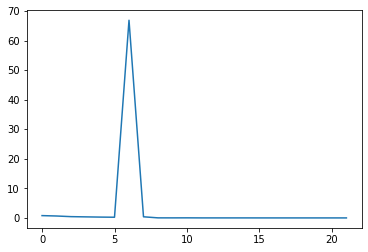

In [12]:
import matplotlib.pyplot as plt  
import numpy as np
    
x0 = mat([[0], [0]])
result = rank1_test(fun, gfun, x0) 
n = len(result)
ax = plt.figure().add_subplot(111)
x = arange(0, n, 1)
y = result
ax.plot(x,y)
print (n)
print (result[n-1])
print (result)   # 迭代中间结果
plt.show()

由上可知，第5次和第9次迭代产生的都不是正定矩阵。